# Item Sales Prediction

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:\datasets\salesdataset.csv')

In [3]:
#printing first five rows of dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Number of rows and columns of dataset

data.shape

(8523, 12)

In [5]:
# Columns Names and Number of non-null values in that dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Number of null values present in particular columns

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

In [7]:
# Replacing null values in the item weight with the mean value

mean_value=data['Item_Weight'].mean()
data['Item_Weight'].fillna(mean_value,inplace=True)

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Replacing null-values in the Outlet_Size with mode

mode_of_outlet_size=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()))

In [10]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
# null values in the outlet size

missing_values=data['Outlet_Size'].isnull()

In [12]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [13]:
# Converting mode_of_outlet_size into dictionary format

dic=mode_of_outlet_size.T.to_dict()
final_dic=dic['Outlet_Size']

In [14]:
print(final_dic)

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small', 'Supermarket Type2': 'Medium', 'Supermarket Type3': 'Medium'}


In [16]:
# Replacing null value with mode

data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].map(final_dic)

In [19]:
data.tail(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8473,DRI47,14.700000,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,Grocery Store,431.4384
8474,NCJ42,19.750000,Low Fat,0.014330,Household,104.2332,OUT045,2002,Small,Tier 2,Supermarket Type1,2153.1972
8475,NCS17,18.600000,Low Fat,0.080627,Health and Hygiene,92.5436,OUT049,1999,Medium,Tier 1,Supermarket Type1,378.1744
8476,NCO41,12.500000,Low Fat,0.018887,Health and Hygiene,98.8384,OUT045,2002,Small,Tier 2,Supermarket Type1,1280.9992
8477,FDC05,13.100000,Regular,0.099343,Frozen Foods,198.1768,OUT017,2007,Small,Tier 2,Supermarket Type1,1970.7680
8478,FDX34,6.195000,Low Fat,0.071972,Snack Foods,121.3098,OUT035,2004,Small,Tier 2,Supermarket Type1,4820.3920
8479,FDL10,8.395000,Low Fat,0.039554,Snack Foods,99.1042,OUT049,1999,Medium,Tier 1,Supermarket Type1,2579.3092
8480,FDQ58,12.857645,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8481,FDT56,16.000000,Regular,0.115827,Fruits and Vegetables,56.0246,OUT045,2002,Small,Tier 2,Supermarket Type1,695.0952
8482,FDZ28,20.000000,Regular,0.051702,Frozen Foods,125.8678,OUT018,2009,Medium,Tier 3,Supermarket Type2,763.0068


In [72]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [74]:
# Using seaborn library

sns.set()

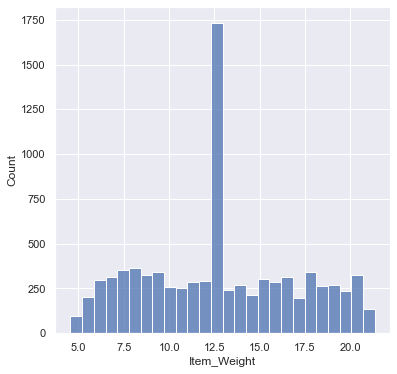

In [75]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Weight'])
plt.show()

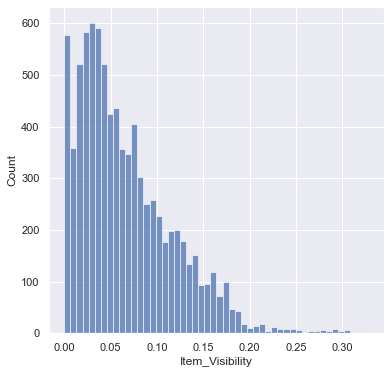

In [76]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Visibility'])
plt.show()

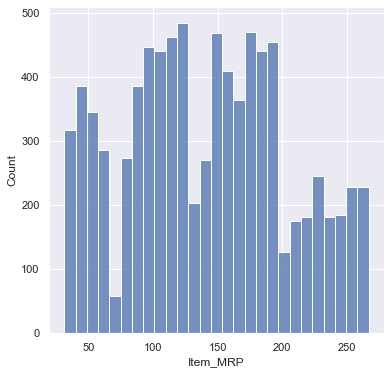

In [77]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_MRP'])
plt.show()

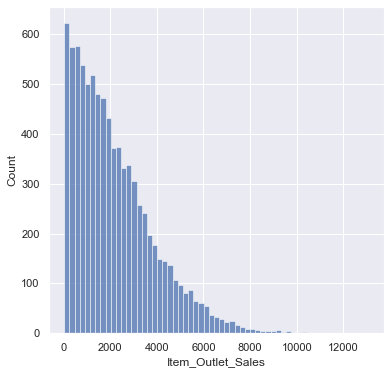

In [78]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Outlet_Sales'])
plt.show()

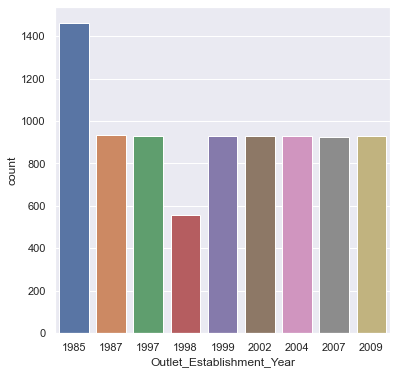

In [79]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

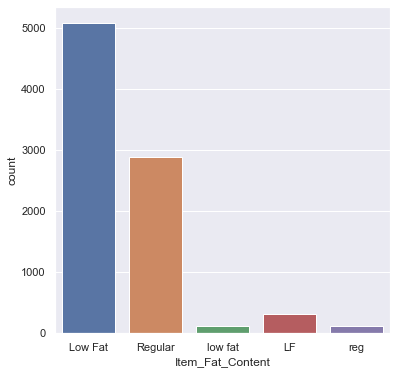

In [80]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

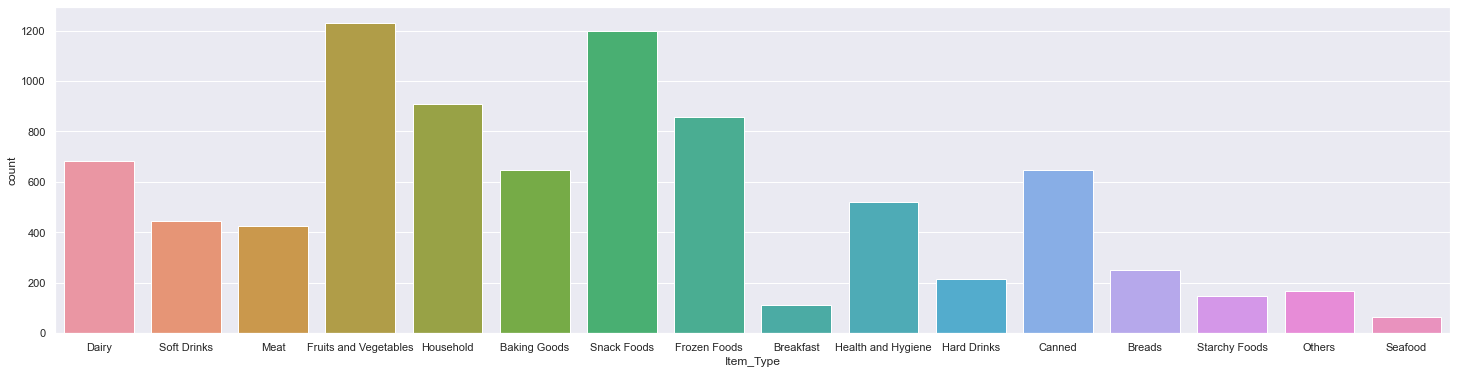

In [81]:

plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data=data)
plt.show()

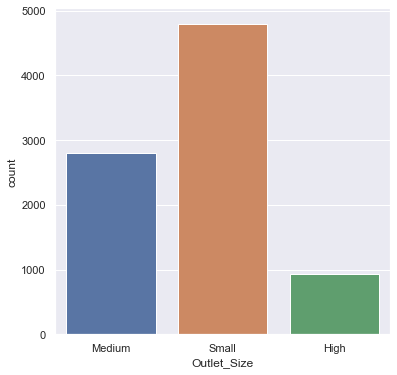

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=data)
plt.show()

In [83]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [84]:
# Changing LF and low fat values to Low Fat
#Changing reg to Regular

data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [85]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Lable Encoding

In [86]:
# Converting all categorical data into numerical data

from sklearn.preprocessing import LabelEncoder

In [87]:
le=LabelEncoder()

In [88]:
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

data['Item_Type']=le.fit_transform(data['Item_Type'])

data['Outlet_Identifier']=le.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])


In [89]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [39]:
data.to_csv('D:\datasets\salesdataset1.csv')

In [37]:
data1=data.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
ss=StandardScaler()

In [179]:
X=data1.drop('Item_Outlet_Sales',axis=1)
y=data1.loc[:,'Item_Outlet_Sales'].to_numpy().reshape(-1,1)

In [180]:
X=ss.fit_transform(X)
y=ss.fit_transform(y)

In [181]:
X

array([[-0.84187169, -0.73814723, -0.97073217, ..., -0.66408049,
        -1.36933384, -0.25265831],
       [-1.64170589,  1.35474328, -0.90811123, ..., -0.66408049,
         1.09156913,  1.00297245],
       [ 1.09855449, -0.73814723, -0.95691733, ..., -0.66408049,
        -1.36933384, -0.25265831],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, ...,  0.79995418,
        -0.13888236, -0.25265831],
       [-1.33644372,  1.35474328,  1.53287976, ..., -0.66408049,
         1.09156913,  1.00297245],
       [ 0.45963367, -0.73814723, -0.41193591, ...,  0.79995418,
        -1.36933384, -0.25265831]])

In [182]:
y

array([[ 0.910601  ],
       [-1.01844035],
       [-0.04923754],
       ...,
       [-0.57909963],
       [-0.19672492],
       [-0.82959407]])

# Spliting data into Training and Testing data

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [185]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 8) (6818, 8) (1705, 8)


In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
lr=LinearRegression()

In [188]:
lr.fit(X_train,y_train)

LinearRegression()

# Evaluation

In [189]:
y_pred=lr.predict(X_test)

In [190]:
# importing mean_squared_error and r2_score

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,y_pred)

0.4790855573003687

In [191]:
r2_score(y_test,y_pred)

0.5127196469828814

In [192]:
from xgboost import XGBRegressor

In [193]:
regressor=XGBRegressor()


In [194]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [195]:
y_pred=regressor.predict(X_test)

In [196]:
r2_score(y_test,y_pred)

0.5188667818296873

In [197]:
mean_squared_error(y_test,y_pred)

0.47304180136880314

In [198]:
data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001229,-0.014105,-0.001262,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367
